In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import utils

C:\Users\Holger\AppData\Local\Temp\ipykernel_6936\3442103045.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(tick) for tick in ax.get_yticks()], fontsize=16)


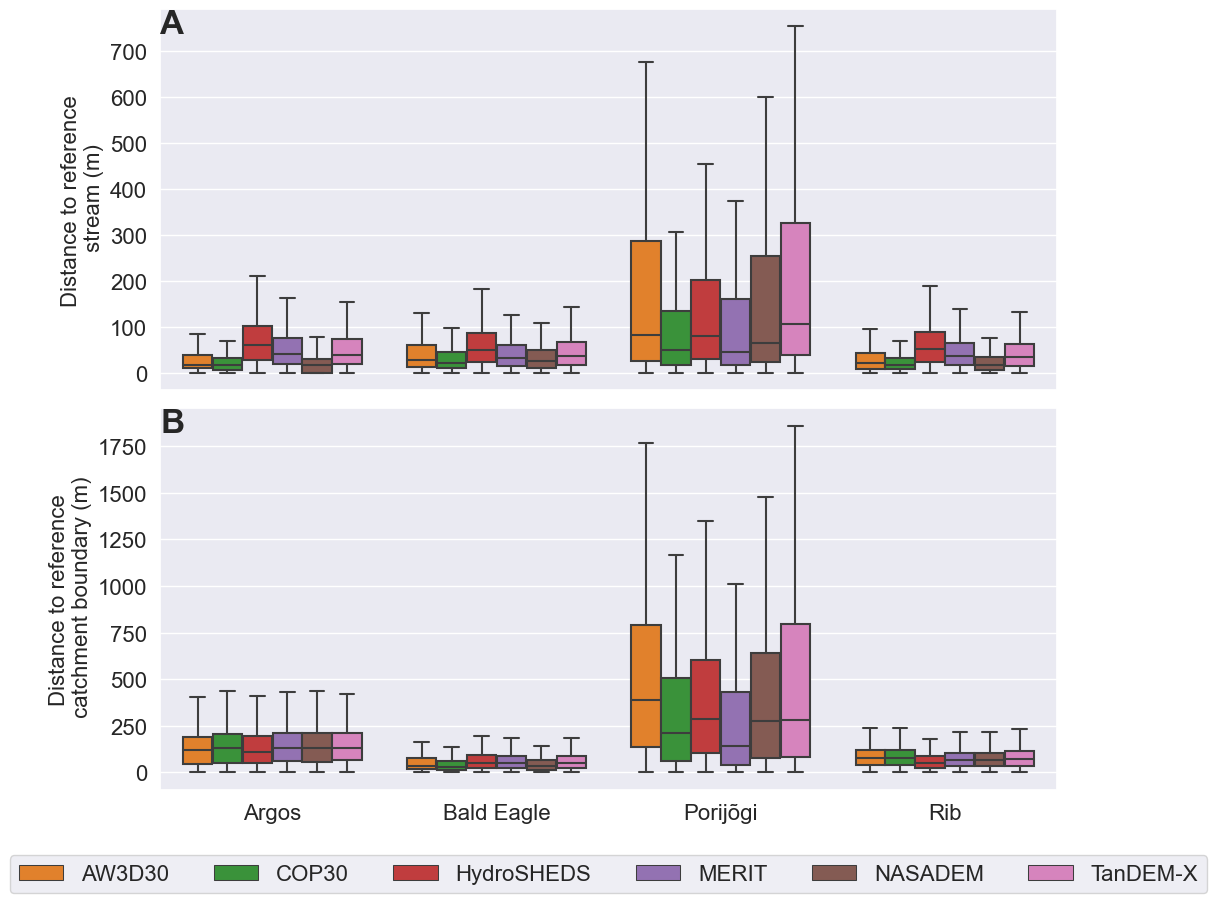

In [2]:
# Input parameters
country_codes = ['ESP', 'USA', 'EST', 'ETH']
dem_names = ['AW3D30', 'COP30', 'HydroSHEDS', 'MERIT', 'NASADEM', 'TanDEM']
feature_types = ['basin', 'stream']

# Create figure and save as PNG
sns.set_palette(sns.color_palette([utils.get_hex_code(dem_name) for dem_name in dem_names]))
fig, axes = plt.subplots(2, 1, figsize=(12, 9), sharex=True)

# Plot streams
feature_type = 'stream'
df_list = []
for country_code in country_codes:
    dist_stats = pd.concat(
        [utils.read_stats(country_code, dem_name, feature_type, 'dist_to_ref') for dem_name in dem_names]
    ).reset_index(drop=True)
    df_list.append(dist_stats)
stats_df = pd.concat(df_list).reset_index(drop=True)
stats_df = stats_df.sort_values(['catchment_name', 'dem_name'])
sns.boxplot(y='dist_to_ref', x='country_code', data=stats_df, hue='dem_name', ax=axes[0], showfliers=False)
axes[0].set_xlabel(None)
ylabel = f'Distance to reference\n {feature_type} (m)'
axes[0].set_ylabel(ylabel, fontsize=16)
axes[0].text(0, 1, 'A', ha='left', va='top', transform=axes[0].transAxes, size=24, weight='bold')

# Plot basins
feature_type = 'basin'
df_list = []
for country_code in country_codes:
    dist_stats = pd.concat(
        [utils.read_stats(country_code, dem_name, feature_type, 'dist_to_ref') for dem_name in dem_names]
    ).reset_index(drop=True)
    df_list.append(dist_stats)
stats_df = pd.concat(df_list).reset_index(drop=True)
stats_df = stats_df.sort_values(['catchment_name', 'dem_name'])
sns.boxplot(y='dist_to_ref', x='country_code', data=stats_df, hue='dem_name', ax=axes[1], showfliers=False)
axes[1].set_xlabel(None)
ylabel = f'Distance to reference\n catchment boundary (m)'
axes[1].set_ylabel(ylabel, fontsize=16)
axes[1].text(0, 1, 'B', ha='left', va='top', transform=axes[1].transAxes, size=24, weight='bold')

for ax in axes.flatten():
    if ax != fig.axes[-1]:
        ax.get_legend().remove()
    ax.set_xticklabels([utils.get_catchment_name(country_code) for country_code in country_codes], fontsize=16)
    ax.set_yticklabels([round(tick) for tick in ax.get_yticks()], fontsize=16)
    for container in ax.containers:
        ax.bar_label(container, fontsize=16)
handles, labels = axes[1].get_legend_handles_labels()
labels[-1] = 'TanDEM-X'
plt.legend(handles=handles, labels=labels, loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.3), title_fontsize=16, fontsize=16)
plt.tight_layout()
plt.savefig(f'D:/dem_comparison/figures/dist_to_ref.png', dpi=300)